Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.43      0.05      0.09      1496

    accuracy                           0.85     10000
   macro avg       0.64      0.52      0.50     10000
weighted avg       0.79      0.85      0.79     10000

AUC: 0.6532684288865636
Confusion Matrix:
 [[8405   99]
 [1422   74]]


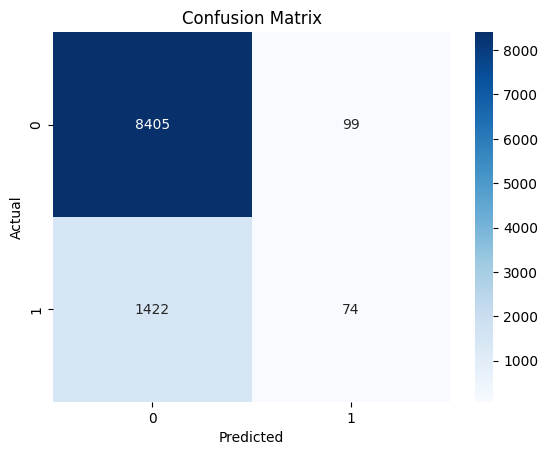

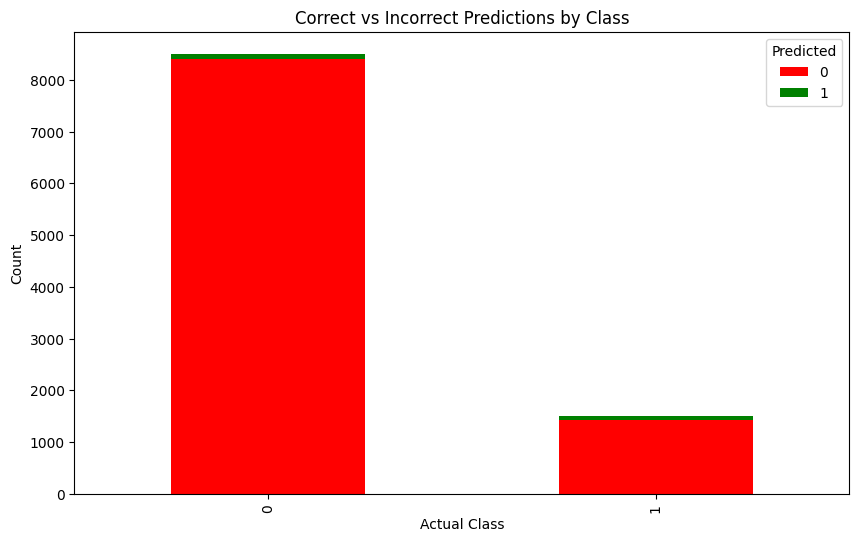

                 Feature  Importance
1          purchase_lead    0.279689
3            flight_hour    0.187981
2         length_of_stay    0.175812
8        flight_duration    0.128688
4             flight_day    0.112099
0         num_passengers    0.055254
7  wants_in_flight_meals    0.024890
5    wants_extra_baggage    0.018073
6   wants_preferred_seat    0.017514


<Figure size 1000x800 with 0 Axes>

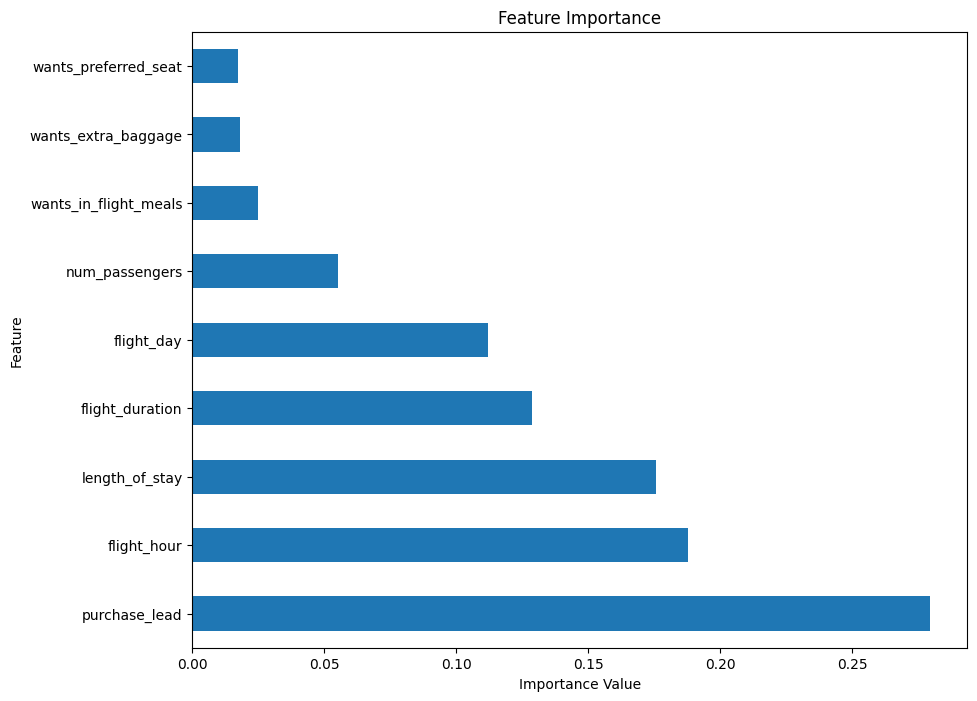

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

# 展示星期几的对应数值
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)

# 选择数值型数据列
# 通过筛选出所有数值类型的列，只保留需要的数值型特征进行训练
df_numeric = df.select_dtypes(include=['number'])

# 分割数据集：特征变量 X 和目标变量 y
X = df_numeric.drop('booking_complete', axis=1)
y = df_numeric['booking_complete']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 构建随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 评估模型在测试集上的表现
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 打印分类报告
print('Classification Report:\n', classification_report(y_test, y_pred))

# 计算 AUC
print('AUC:', roc_auc_score(y_test, y_proba))

# 打印混淆矩阵
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# 混淆矩阵热力图
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 推测和实际结果的对比：文图同步
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# 历史数据分类结果的堆积条形图
confusion_results = results_df.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)
confusion_results.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions by Class')
plt.show()

# 特征重要性的可视化
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 打印特征重要性
print(feature_importances)

# 用柱状图可视化特征重要性
plt.figure(figsize=(10, 8))
feature_importances.set_index('Feature').plot(kind='barh', legend=False, figsize=(10, 8))
plt.xlabel('Importance Value')
plt.title('Feature Importance')
plt.show()
